In [1]:
#importing library files

import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#reading data from csv file
data = pd.read_csv("advertising.csv")


In [3]:
data.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [5]:
data.shape

(200, 4)

<AxesSubplot:xlabel='Newspaper', ylabel='Sales'>

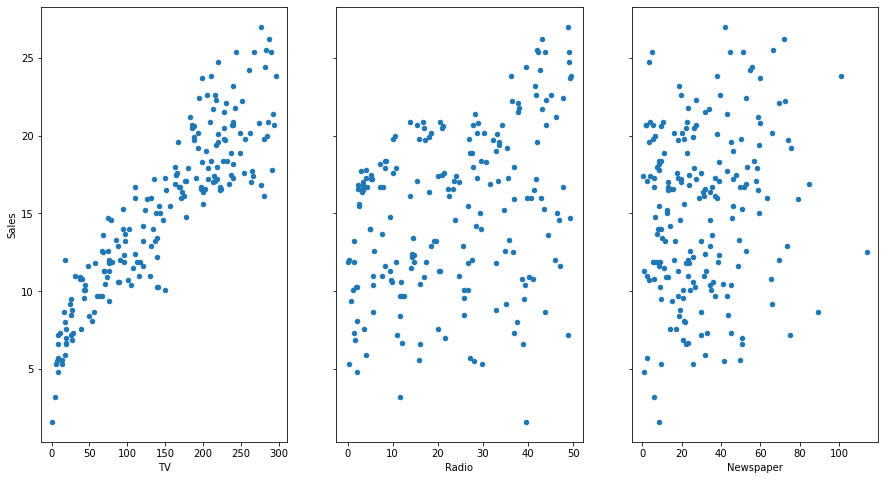

In [10]:
fig,ax=plt.subplots(1,3,sharey=True)
data.plot(kind='scatter',x='TV',y='Sales',ax=ax[0],figsize=(15,8))
data.plot(kind='scatter',x='Radio',y='Sales',ax=ax[1])
data.plot(kind='scatter',x='Newspaper',y='Sales',ax=ax[2])

In [32]:
#creating X and y
feature_cols = ['TV']
X = data[feature_cols]
y = data.Sales



In [33]:
#importing simple linear regression from sklearn
from sklearn.linear_model import LinearRegression
lm = LinearRegression()

lm.fit(X,y)

#print the intercept and co-effiecnts 

print(lm.intercept_)
print(lm.coef_)

6.974821488229891
[0.05546477]


In [34]:
6.974821488229891+0.05546477*50

9.74805998822989

In [35]:
X_new = pd.DataFrame({'Tv':[100]})
X_new

,Tv
0,100


In [38]:
# predictions on a new value
lm.predict(X_new)

array([12.52129854])

In [40]:
#plotting least square line
# creating a DataFrame with the minimum and maximum values of TV

X_new=pd.DataFrame({'Tv':[data.TV.max(),data.TV.min()]})
X_new

,Tv
0,296.4
1,0.7


In [42]:
#predicting X values and storing them
prediction=lm.predict(X_new)
prediction

array([23.41457946,  7.01364683])

<AxesSubplot:xlabel='TV', ylabel='Sales'>

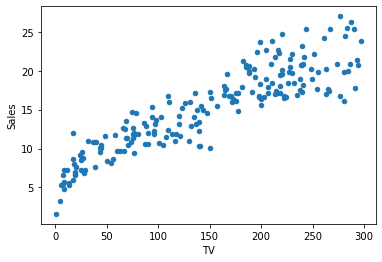

In [43]:
data.plot(kind='scatter',x='TV',y='Sales')

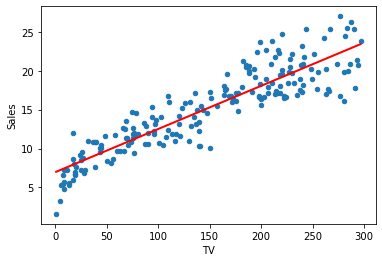

In [55]:
data.plot(kind='scatter',x='TV',y='Sales')
#plotting least square line
plt.plot(X_new, prediction, c='red', linewidth=2)

In [57]:
import statsmodels.formula.api as smf
lm = smf.ols(formula='Sales ~ TV', data=data).fit()
lm.conf_int()

,0,1
Intercept,6.338740,7.610903
TV,0.051727,0.059203


In [60]:
# p-values for the model coefficients
lm.pvalues

Intercept    1.682677e-34
TV           1.892945e-95
Newspaper    9.538145e-01
Radio        4.602097e-27
dtype: float64

In [61]:
# R-squared value for the model
lm.rsquared

0.9025912899684558

In [62]:
#multi linear regression

In [63]:
feature_cols = ['TV', 'Radio', 'Newspaper']
X = data[feature_cols]
y = data.Sales

lm = LinearRegression()
lm.fit(X, y)

LinearRegression()

In [64]:
# intercept and coefficients
print(lm.intercept_)
print(lm.coef_)

4.625124078808652
[0.05444578 0.10700123 0.00033566]


In [66]:
lm = smf.ols(formula='Sales ~ TV + Radio + Newspaper', data=data).fit()
lm.conf_int()


,0,1
Intercept,4.018688,5.231560
TV,0.051734,0.057158
Radio,0.090259,0.123744
Newspaper,-0.011079,0.011751


In [67]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.903
Model:                            OLS   Adj. R-squared:                  0.901
Method:                 Least Squares   F-statistic:                     605.4
Date:                Wed, 29 Sep 2021   Prob (F-statistic):           8.13e-99
Time:                        09:25:41   Log-Likelihood:                -383.34
No. Observations:                 200   AIC:                             774.7
Df Residuals:                     196   BIC:                             787.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.6251      0.308     15.041      0.000       4.019       5.232
TV             0.0544      0.001     39.592      0.000       0.052       0.057
Radio          0.1070      0.008     12.604      0.000       0.090       0.124
Newspaper      0.0003      0.006      0.058      0.954      -0.011       0.012
==============================================================================
Omnibus:                       16.081   Durbin-Watson:                   2.251
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               27.655
Skew:                          -0.431   Prob(JB):                     9.88e-07
Kurtosis:                       4.605   Cond. No.                         454.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [68]:
# TV and Radio in the model
lm = smf.ols(formula='Sales ~ TV + Radio', data=data).fit()
lm.rsquared

0.9025896186081139

In [69]:
lm = smf.ols(formula='Sales ~ TV + Radio + Newspaper', data=data).fit()
lm.rsquared

0.9025912899684558